<div style="text-align: center;">
 Task 2: Investigating Patterns and Relationships
</div>


In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import kruskal

In [3]:
data = pd.read_csv('merged_icu_diabetes_data.csv')
data.head()

,encounter_id,Patient_ID,race,gender,age_group,admission_type,discharge_disposition,admission_source,days_in_hospital,payer_code,...,Blood_Pressure_Diastolic,SpO2,Respiratory_Rate,Temperature,Medications,Number_of_Lab_Tests,Number_of_Medications,Readmission_Flag,Glucose_Level_Category,Num_Medications
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,No Code,...,68,97,16,36.509798,Unknown,9,1,0,High,1
1,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,No Code,...,61,92,15,39.599822,Unknown,17,3,1,High,1
2,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,No Code,...,63,95,16,37.639906,Steroids,6,2,0,High,1
3,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,No Code,...,75,87,21,39.013647,Insulin,19,3,0,High,1
4,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,No Code,...,72,87,17,37.377471,Insulin,7,4,0,High,1


 ### 1. Exploring Variable Relationships: 
• Investigate how different patient-level features, such as the number of 
medications, number of lab procedures, and ICU stay length, are associated 
with readmission outcomes.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141325 entries, 0 to 141324
Data columns (total 66 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              141325 non-null  int64  
 1   Patient_ID                141325 non-null  int64  
 2   race                      141325 non-null  object 
 3   gender                    141325 non-null  object 
 4   age_group                 141325 non-null  object 
 5   admission_type            132271 non-null  object 
 6   discharge_disposition     133968 non-null  object 
 7   admission_source          141325 non-null  object 
 8   days_in_hospital          141325 non-null  int64  
 9   payer_code                141325 non-null  object 
 10  medical_specialty         141325 non-null  object 
 11  num_lab_procedures        141325 non-null  int64  
 12  num_procedures            141325 non-null  int64  
 13  num_medications           141325 non-null  i

#### Descriptive Statistics

In [8]:
# Group the data by readmission outcome and calculate the mean for numerical variables
grouped = data.groupby('Readmission_Flag')[['num_medications', 'num_lab_procedures', 'ICU_Length_of_Stay']].mean()
grouped

,num_medications,num_lab_procedures,ICU_Length_of_Stay
Readmission_Flag,,,
0,15.844113,43.449170,8.469579
1,15.855454,43.392217,8.498912


#### Visualizing Relationships

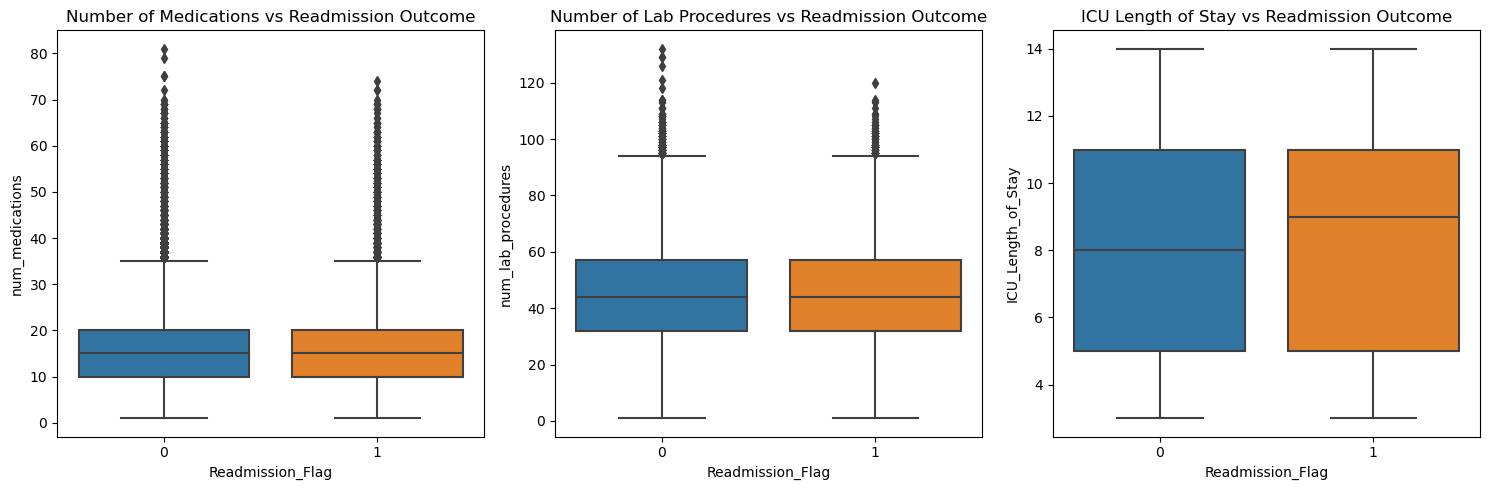

In [10]:
# Visualize the distribution of numerical features by readmission outcome
plt.figure(figsize=(15, 5))
# Number of medications
plt.subplot(1, 3, 1)
sns.boxplot(x='Readmission_Flag', y= 'num_medications', data=data)
plt.title('Number of Medications vs Readmission Outcome')

# Number of lab procedures
plt.subplot(1, 3, 2)
sns.boxplot(x='Readmission_Flag', y='num_lab_procedures', data=data)
plt.title('Number of Lab Procedures vs Readmission Outcome')

# ICU length of stay
plt.subplot(1, 3, 3)
sns.boxplot(x='Readmission_Flag', y='ICU_Length_of_Stay', data=data)
plt.title('ICU Length of Stay vs Readmission Outcome')

plt.tight_layout()
plt.show()

#### Statistical Testing (T-tests)

In [13]:
# Perform T-tests to see if there is a significant difference between readmitted and not readmitted groups
# T-test for 'num_medications'
medications_grouped = data.groupby('Readmission_Flag')['num_medications'].mean()
medications_ttest = stats.ttest_ind(data[data['Readmission_Flag'] == 0]['num_medications'], 
                                    data[data['Readmission_Flag'] == 1]['num_medications'])
print(f"T-test for 'num_medications': {medications_ttest}")

T-test for 'num_medications': TtestResult(statistic=-0.24002145243177053, pvalue=0.8103139741321768, df=141323.0)


In [15]:
# T-test for 'num_lab_procedures'
lab_procedures_ttest = stats.ttest_ind(data[data['Readmission_Flag'] == 0]['num_lab_procedures'], 
                                       data[data['Readmission_Flag'] == 1]['num_lab_procedures'])
print(f"T-test for 'num_lab_procedures': {lab_procedures_ttest}")

T-test for 'num_lab_procedures': TtestResult(statistic=0.507008974849651, pvalue=0.6121493124278403, df=141323.0)


In [17]:
# T-test for 'ICU_Length_of_Stay'
icu_stay_ttest = stats.ttest_ind(data[data['Readmission_Flag'] == 0]['ICU_Length_of_Stay'], 
                                 data[data['Readmission_Flag'] == 1]['ICU_Length_of_Stay'])
print(f"T-test for 'ICU_Length_of_Stay': {icu_stay_ttest}")

T-test for 'ICU_Length_of_Stay': TtestResult(statistic=-1.4603525734753402, pvalue=0.14419542301156948, df=141323.0)


#### Correlation Analysis

In [19]:
# Correlation between numerical variables and readmission outcome
correlation_matrix = data[['num_medications', 'num_lab_procedures', 'ICU_Length_of_Stay', 'Readmission_Flag']].corr()
print("Correlation Matrix")
correlation_matrix

Correlation Matrix


,num_medications,num_lab_procedures,ICU_Length_of_Stay,Readmission_Flag
num_medications,1.000000,0.244428,-0.005346,0.000638
num_lab_procedures,0.244428,1.000000,-0.001598,-0.001349
ICU_Length_of_Stay,-0.005346,-0.001598,1.000000,0.003885
Readmission_Flag,0.000638,-0.001349,0.003885,1.000000


In [21]:
# Step 1: Group by patient characteristics (age, gender, diagnosis)
# We'll calculate the mean readmission rate for each group
age_group_readmission = data.groupby('age_group')['Readmission_Flag'].mean()
age_group_readmission

age_group
[0-10)      0.313993
[10-20)     0.327884
[20-30)     0.299787
[30-40)     0.305951
[40-50)     0.291286
[50-60)     0.297015
[60-70)     0.305556
[70-80)     0.294719
[80-90)     0.300026
[90-100)    0.312958
Name: Readmission_Flag, dtype: float64

In [23]:
gender_readmission = data.groupby('gender')['Readmission_Flag'].mean()
gender_readmission

gender
Female             0.298042
Male               0.300775
Unknown/Invalid    0.000000
Name: Readmission_Flag, dtype: float64

In [25]:
diag_1_readmission = data.groupby('diag_1')['Readmission_Flag'].mean()
diag_1_readmission

diag_1
10     0.000000
11     0.384615
110    0.000000
112    0.290323
114    0.000000
         ...   
V63    0.500000
V66    0.666667
V67    0.000000
V70    0.000000
V71    0.000000
Name: Readmission_Flag, Length: 717, dtype: float64

#### Visualize the relationships

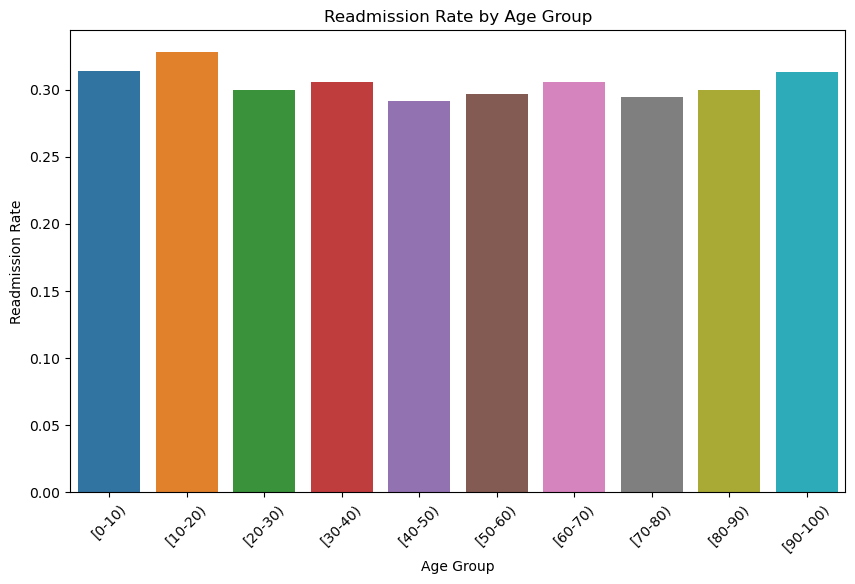

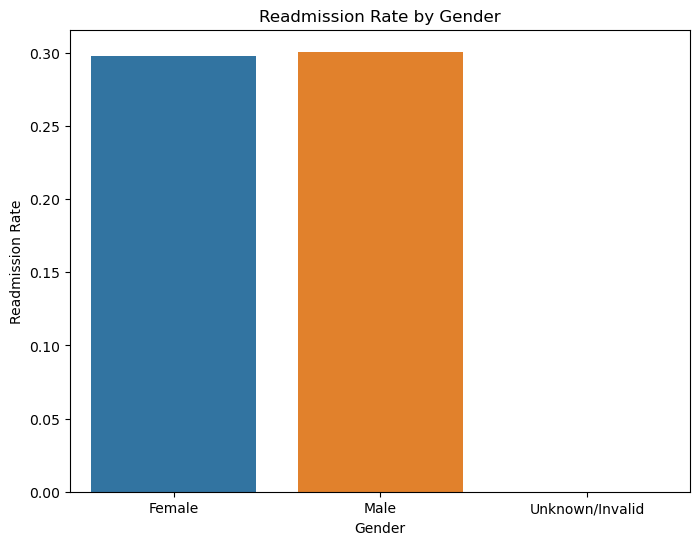

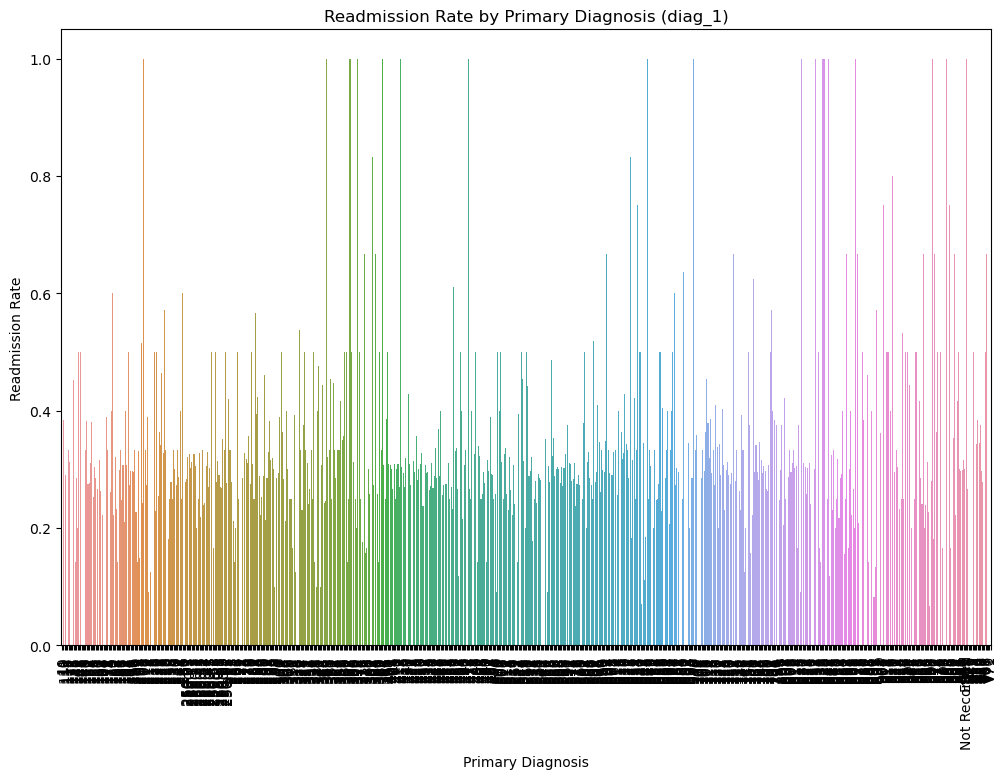

In [28]:
# Plot readmission rate by age group
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_readmission.index, y=age_group_readmission.values)
plt.title('Readmission Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Readmission Rate')
plt.xticks(rotation=45)
plt.show()

# Plot readmission rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_readmission.index, y=gender_readmission.values)
plt.title('Readmission Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Readmission Rate')
plt.show()

# Plot readmission rate by primary diagnosis (diag_1)
plt.figure(figsize=(12, 8))
sns.barplot(x=diag_1_readmission.index, y=diag_1_readmission.values)
plt.title('Readmission Rate by Primary Diagnosis (diag_1)')
plt.xlabel('Primary Diagnosis')
plt.ylabel('Readmission Rate')
plt.xticks(rotation=90)
plt.show()


#### Statistical Testing (Chi-Square Test for Categorical Variables)

In [30]:
# Chi-square test to check if there is an association between categorical features and readmission
# Gender vs Readmission
gender_chi2 = stats.chi2_contingency(pd.crosstab(data['gender'], data['Readmission_Flag']))
print(f"Chi-square test for Gender vs Readmission: {gender_chi2[0]}, p-value: {gender_chi2[1]}")

Chi-square test for Gender vs Readmission: 2.959683168678735, p-value: 0.227673752615097


In [32]:
# Age Group vs Readmission
age_chi2 = stats.chi2_contingency(pd.crosstab(data['age_group'], data['Readmission_Flag']))
print(f"Chi-square test for Age Group vs Readmission: {age_chi2[0]}, p-value: {age_chi2[1]}")

Chi-square test for Age Group vs Readmission: 23.359794254388884, p-value: 0.005436892944505035


In [34]:
# Diagnosis Type vs Readmission (Primary Diagnosis, diag_1)
diag_chi2 = stats.chi2_contingency(pd.crosstab(data['diag_1'], data['Readmission_Flag']))
print(f"Chi-square test for Primary Diagnosis vs Readmission: {diag_chi2[0]}, p-value: {diag_chi2[1]}")

Chi-square test for Primary Diagnosis vs Readmission: 802.0171972880347, p-value: 0.013713435072091197


In [36]:
# Investigate if there are any interaction effects between age, gender, and diagnosis
# Create a cross-tabulation table of age and gender vs readmission
age_gender_crosstab = pd.crosstab([data['age_group'], data['gender']], data['Readmission_Flag'])
print("\nCross-tabulation of Age, Gender, and Readmission:")
(age_gender_crosstab)


Cross-tabulation of Age, Gender, and Readmission:


Readmission_Flag               0     1
age_group gender                      
[0-10)    Female             110    40
          Male                91    52
[10-20)   Female             435   199
          Male               305   162
[20-30)   Female            1125   477
          Male               517   226
[30-40)   Female            2137   979
          Male              1665   697
[40-50)   Female            4870  2020
          Male              4979  2028
[50-60)   Female            8506  3588
          Male              8618  3647
[60-70)   Female           10680  4600
          Male             10778  4842
          Unknown/Invalid      1     0
[70-80)   Female           13891  5770
          Male             11829  4979
          Unknown/Invalid      3     0
[80-90)   Female            9844  4140
          Male              6114  2700
[90-100)  Female            1788   854
          Male               741   298

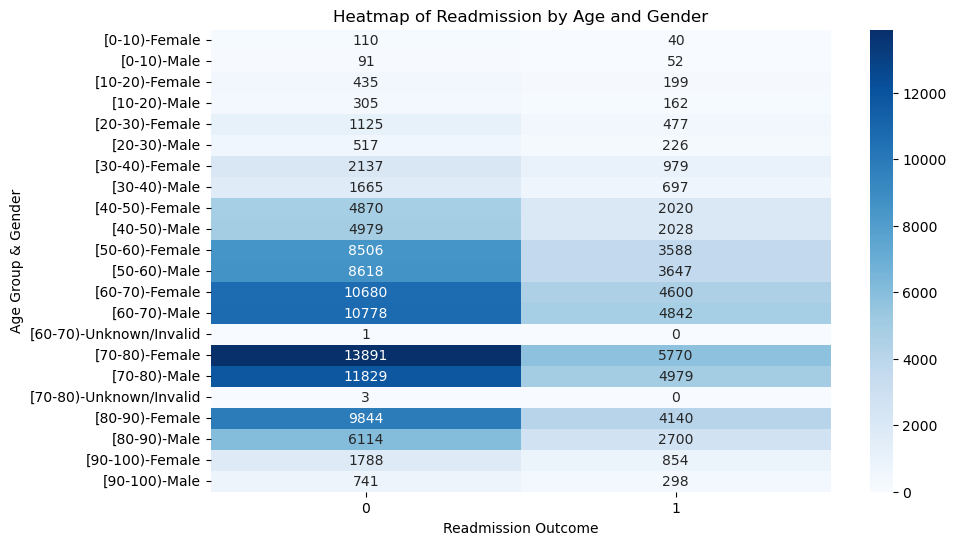

In [38]:
# Visualize the cross-tabulated data with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(age_gender_crosstab, annot=True, fmt="d", cmap="Blues")
plt.title('Heatmap of Readmission by Age and Gender')
plt.xlabel('Readmission Outcome')
plt.ylabel('Age Group & Gender')
plt.show()

## 2. Checking Group Differences

• Analyze whether different groups (e.g., age groups, medication categories, 
lab test counts) have significant differences in patient outcomes (e.g., 
readmission rates or length of stay). 

In [41]:
# Group by age group and calculate mean outcomes
age_group_outcomes = data.groupby('age_group')[['Readmission_Flag', 'days_in_hospital']].mean()
print("Age Group Outcomes (Readmission Rate and Length of Stay):")
(age_group_outcomes)

Age Group Outcomes (Readmission Rate and Length of Stay):


,Readmission_Flag,days_in_hospital
age_group,,
[0-10),0.313993,2.539249
[10-20),0.327884,3.240690
[20-30),0.299787,3.582942
[30-40),0.305951,3.822198
[40-50),0.291286,4.096855
[50-60),0.297015,4.180878
[60-70),0.305556,4.449629
[70-80),0.294719,4.673476
[80-90),0.300026,4.885122


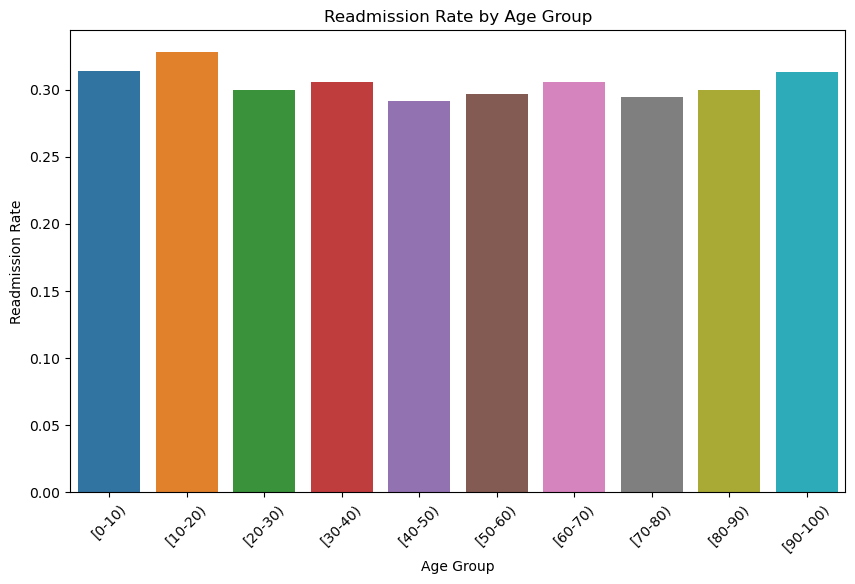

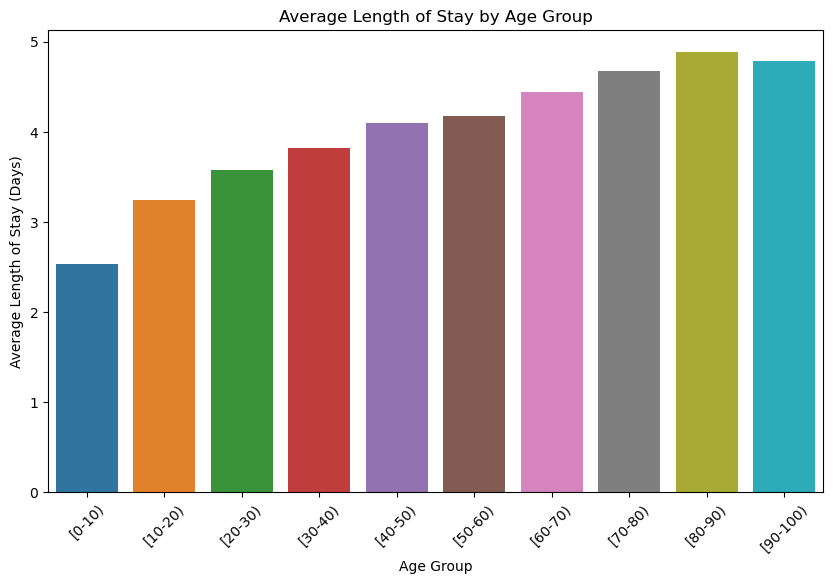

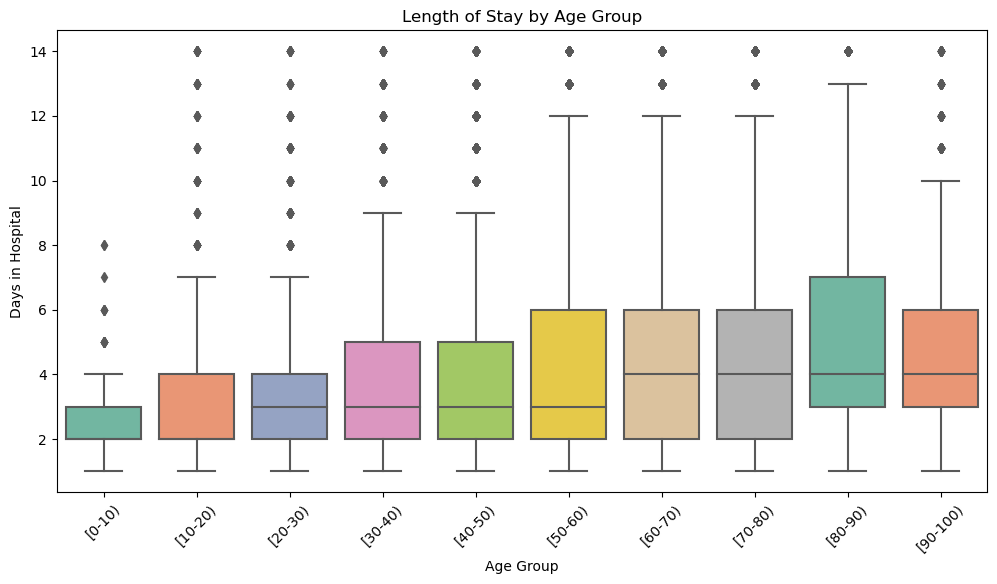

In [54]:
# Step 2: Visualize the outcomes by Age Group

# Plot Readmission Rate by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_outcomes.index, y=age_group_outcomes['Readmission_Flag'])
plt.title('Readmission Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Readmission Rate')
plt.xticks(rotation=45)
plt.show()

# Plot Length of Stay by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_outcomes.index, y=age_group_outcomes['days_in_hospital'])
plt.title('Average Length of Stay by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Length of Stay (Days)')
plt.xticks(rotation=45)
plt.show()

# Boxplot to visualize length of stay by age group
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='days_in_hospital', data=data, palette='Set2')
plt.title('Length of Stay by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Days in Hospital')
plt.xticks(rotation=45)
plt.show()


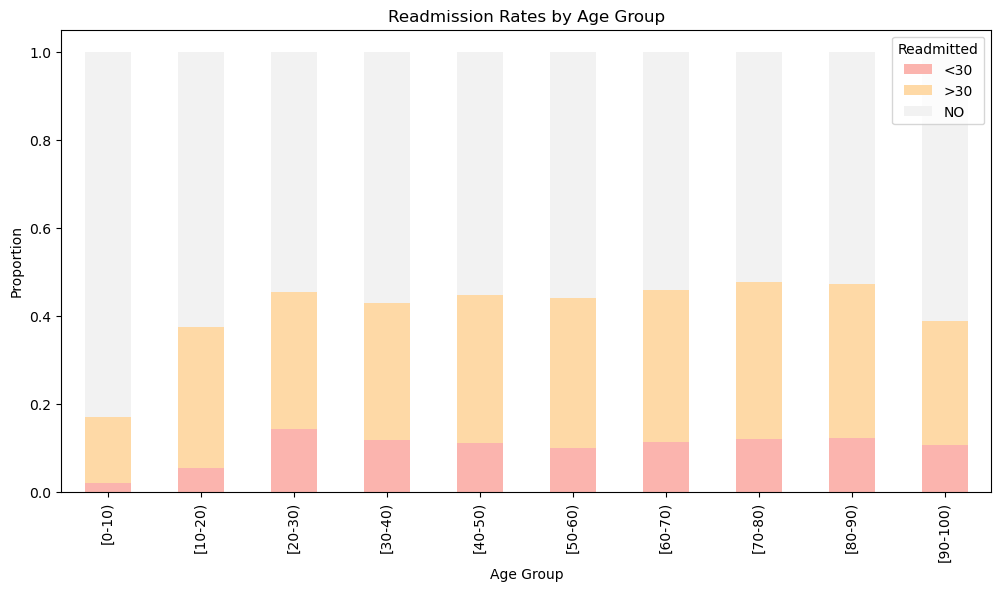

In [56]:
# Calculate readmission rates
readmit_rates = data.groupby('age_group')['readmitted'].value_counts(normalize=True).unstack()

# Bar plot for proportions
readmit_rates.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Pastel1')
plt.title('Readmission Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Readmitted', loc='upper right')
plt.show()


    age_group  days_in_hospital  count
0      [0-10)                 1     58
1      [0-10)                 2     98
2      [0-10)                 3     89
3      [0-10)                 4     30
4      [0-10)                 5     10
..        ...               ...    ...
129  [90-100)                10     98
130  [90-100)                11     78
131  [90-100)                12     54
132  [90-100)                13     39
133  [90-100)                14     37

[134 rows x 3 columns]


<Figure size 1200x600 with 0 Axes>

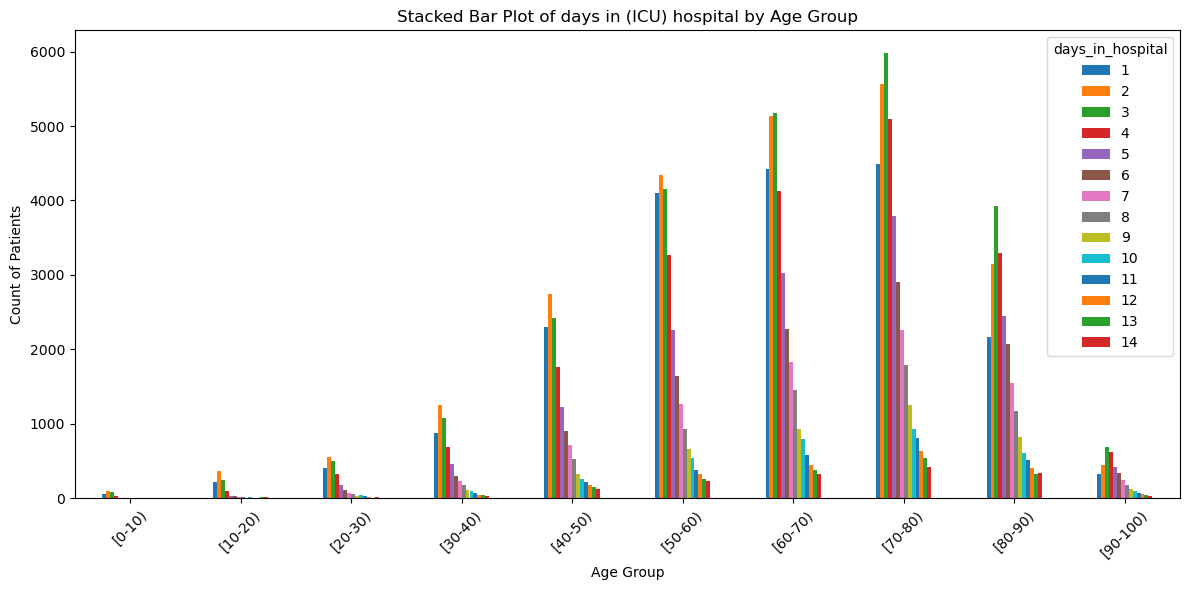

In [106]:
grouped = data.groupby(['age_group', 'days_in_hospital']).size().reset_index(name='count')
print(grouped)

pivot_data = grouped.pivot_table(index='age_group', columns='days_in_hospital', values='count', aggfunc='sum', fill_value=0)

# Plot a stacked bar plot
plt.figure(figsize=(12, 6))
pivot_data.plot(kind='bar', stacked= False , figsize=(12, 6))

# Adding labels and title
plt.title('Stacked Bar Plot of days in (ICU) hospital by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Patients')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

In [58]:
# Separate the data into groups
groups = [group['days_in_hospital'].values for _, group in data.groupby('age_group')]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA Results: F-Statistic = {f_stat}, p-value = {p_value}")

ANOVA Results: F-Statistic = 205.40233236971028, p-value = 0.0


In [62]:
# Create a contingency table
contingency_table = pd.crosstab(data['age_group'], data['readmitted'])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: Chi2 Statistic = {chi2_stat}, p-value = {p_val}")

Chi-Square Test: Chi2 Statistic = 429.8166713505699, p-value = 5.437461468181007e-80


In [45]:
# ANOVA test for Readmission Rate by Age Group
anova_readmission = stats.f_oneway(*(data[data['age_group'] == group]['Readmission_Flag'] for group in data['age_group'].unique()))
print(f"ANOVA for Readmission by Age Group: p-value = {anova_readmission.pvalue}")

ANOVA for Readmission by Age Group: p-value = 0.005435197004439594


In [47]:
# ANOVA test for Length of Stay by Age Group
anova_los = stats.f_oneway(*(data[data['age_group'] == group]['days_in_hospital'] for group in data['age_group'].unique()))
print(f"ANOVA for Length of Stay by Age Group: p-value = {anova_los.pvalue}")

ANOVA for Length of Stay by Age Group: p-value = 0.0


### Visualize Group Differences
• Analyze whether different groups (e.g., age groups, medication categories, 
lab test counts) have significant differences in patient outcomes (e.g., 
readmission rates or length of stay). 

In [75]:
# Explore the Relationship Between Treatments/Medications and Readmission Outcomes
medications_summary = data.groupby('readmitted')[[
    'insulin', 'metformin', 'glyburide', 'glipizide']].value_counts()
medications_summary

readmitted  insulin  metformin  glyburide  glipizide
<30         No       No         No         No           3987
            Steady   No         No         No           3381
            Down     No         No         No           1748
            Up       No         No         No           1451
            No       No         No         Steady        776
                                                        ... 
NO          Steady   No         Up         Up              1
            No       Steady     Steady     Up              1
            Up       Down       Down       No              1
                                No         Down            1
                                           Steady          1
Name: count, Length: 364, dtype: int64

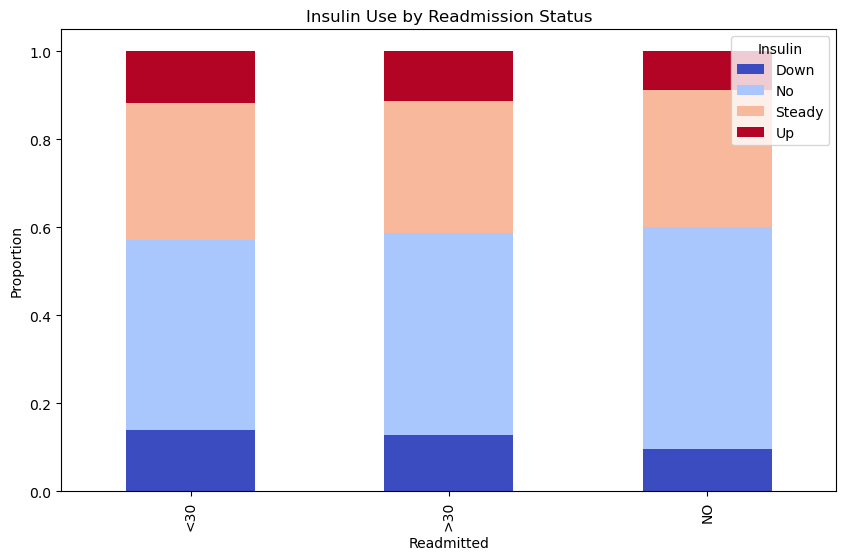

In [77]:
# Calculate proportions of insulin use for each readmission category
insulin_readmission = pd.crosstab(data['readmitted'], data['insulin'], normalize='index')

# Bar plot for insulin usage
insulin_readmission.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Insulin Use by Readmission Status')
plt.xlabel('Readmitted')
plt.ylabel('Proportion')
plt.legend(title='Insulin')
plt.show()

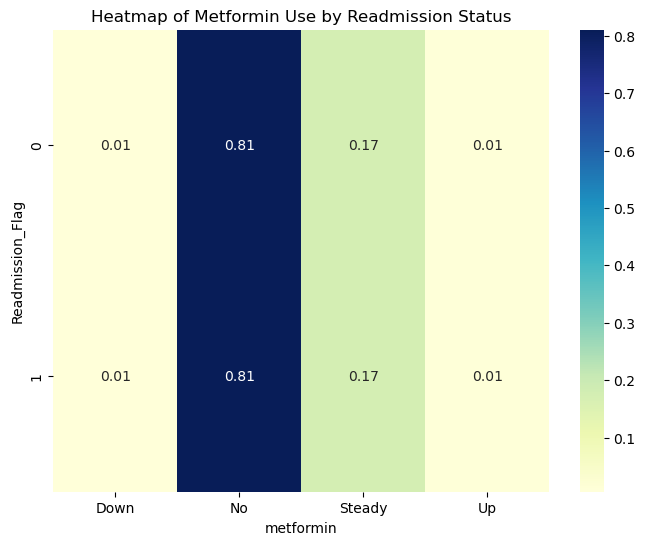

In [81]:
# Create a pivot table for heatmap
medication_pivot = pd.crosstab(data['Readmission_Flag'], data['metformin'], normalize='index')
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(medication_pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap of Metformin Use by Readmission Status')
plt.show()


In [85]:
# Example: Test for `insulin`
contingency_table = pd.crosstab(data['readmitted'], data['insulin'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: Chi2 Statistic = {chi2_stat}, p-value = {p_val}")

if p_val < 0.05:
    print("Significant difference in insulin use between readmission groups.")
else:
    print("No significant difference in insulin use.")

Chi-Square Test: Chi2 Statistic = 877.4410745797293, p-value = 2.8275956686811512e-186
Significant difference in insulin use between readmission groups.


In [91]:
# Separate groups by readmission status
group_no = data[data['readmitted'] == 'NO']['Creatinine']
group_yes = data[data['readmitted'] != 'NO']['Creatinine']

# Perform t-test
t_stat, p_value = ttest_ind(group_no, group_yes, equal_var=False)
print(f"T-Test Results: t-statistic = {t_stat}, p-value = {p_value}")

if p_value < 0.05:
    print("Significant difference in Creatinine levels between readmission groups.")
else:
    print("No significant difference in Creatinine levels.")


T-Test Results: t-statistic = 0.41474716885530427, p-value = 0.678327647282567
No significant difference in Creatinine levels.


### 3. Exploring Distributions: 
• Study the distribution of patient outcomes and clinical features (e.g., number 
of medications or lab results) to identify trends across different groups of 
patients.

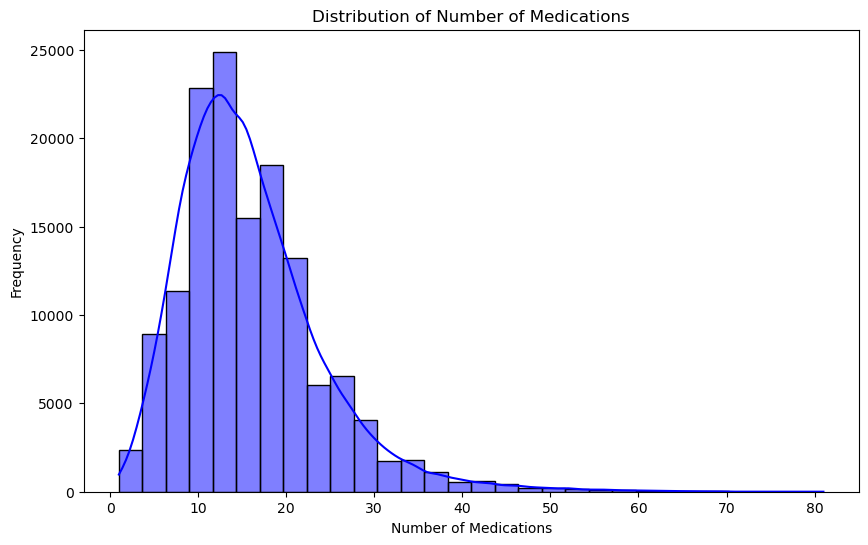

In [103]:
# Distribution of the number of medications
plt.figure(figsize=(10, 6))
sns.histplot(data['num_medications'], kde=True, bins=30, color='blue')
plt.title('Distribution of Number of Medications')
plt.xlabel('Number of Medications')
plt.ylabel('Frequency')
plt.show()


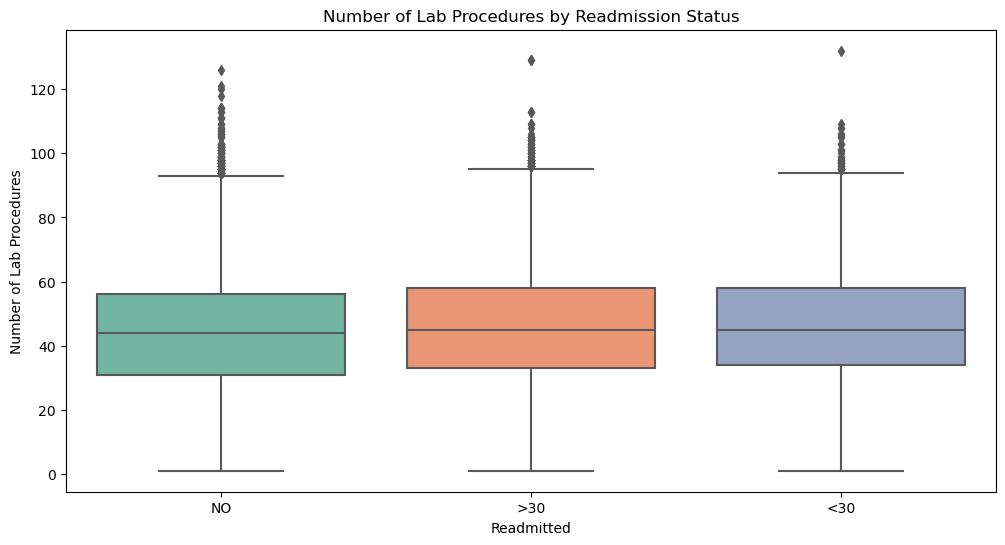

In [108]:
# Boxplot for number of lab procedures by readmission status
plt.figure(figsize=(12, 6))
sns.boxplot(x='readmitted', y='num_lab_procedures', data=data, palette='Set2')
plt.title('Number of Lab Procedures by Readmission Status')
plt.xlabel('Readmitted')
plt.ylabel('Number of Lab Procedures')
plt.show()


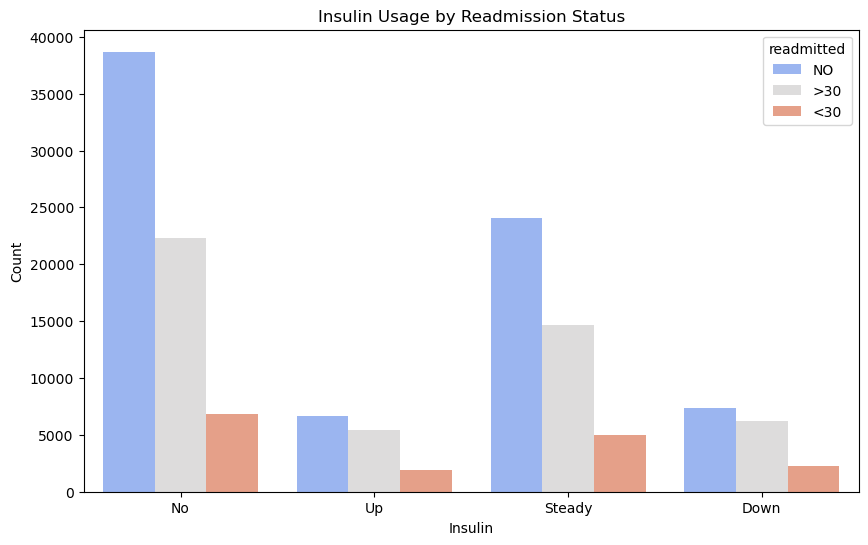

In [110]:
# Count plot for insulin usage
plt.figure(figsize=(10, 6))
sns.countplot(x='insulin', hue='readmitted', data=data, palette='coolwarm')
plt.title('Insulin Usage by Readmission Status')
plt.xlabel('Insulin')
plt.ylabel('Count')
plt.show()


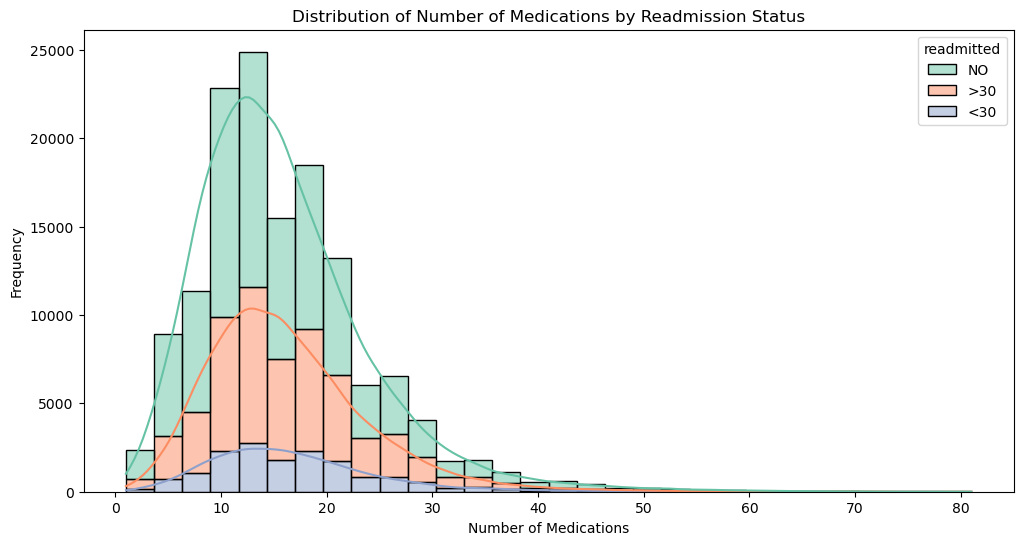

In [112]:
## Split Patients into Groups
# Distribution of number of medications by readmission status
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='num_medications', hue='readmitted', kde=True, bins=30, palette='Set2', multiple='stack')
plt.title('Distribution of Number of Medications by Readmission Status')
plt.xlabel('Number of Medications')
plt.ylabel('Frequency')
plt.show()


In [118]:
# Summary statistics for number of medications by readmission status
summary_stats = data.groupby('readmitted')['num_medications'].describe()

summary_stats


,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
<30,15930.0,16.775643,8.123946,1.0,11.0,16.0,21.0,81.0
>30,48594.0,16.119233,7.605399,1.0,11.0,15.0,20.0,70.0
NO,76801.0,15.483067,8.432971,1.0,10.0,14.0,19.0,79.0


In [136]:
tat, p = shapiro(data['num_medications'])
print(f"Shapiro-Wilk Test: W = {stats}, p-value = {p}")

if p < 0.05:
    print("The distribution is not normal.")
else:
    print("The distribution is normal.")

Shapiro-Wilk Test: W = <module 'scipy.stats' from 'C:\\Users\\husai\\anaconda3\\Lib\\site-packages\\scipy\\stats\\__init__.py'>, p-value = 0.0
The distribution is not normal.


C:\Users\husai\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [142]:
# Use Statistical Tests to Compare Groups
# T-test for comparing two groups (e.g., num_medications for readmitted vs. not readmitted).
# Compare number of medications across readmission groups
group_no = data[data['readmitted'] == 'NO']['num_medications']
group_yes = data[data['readmitted'] != 'NO']['num_medications']

stat, p = kruskal(group_no, group_yes)
print(f"Kruskal-Wallis Test: H = {stat}, p-value = {p}")

if p < 0.05:
    print("Significant differences exist between groups.")
else:
    print("No significant differences between groups.")


Kruskal-Wallis Test: H = 779.5861375692194, p-value = 1.4807230674241303e-171
Significant differences exist between groups.


#### Identify patterns that could indicate potential risk factors for patient readmission or longer hospital stays. 

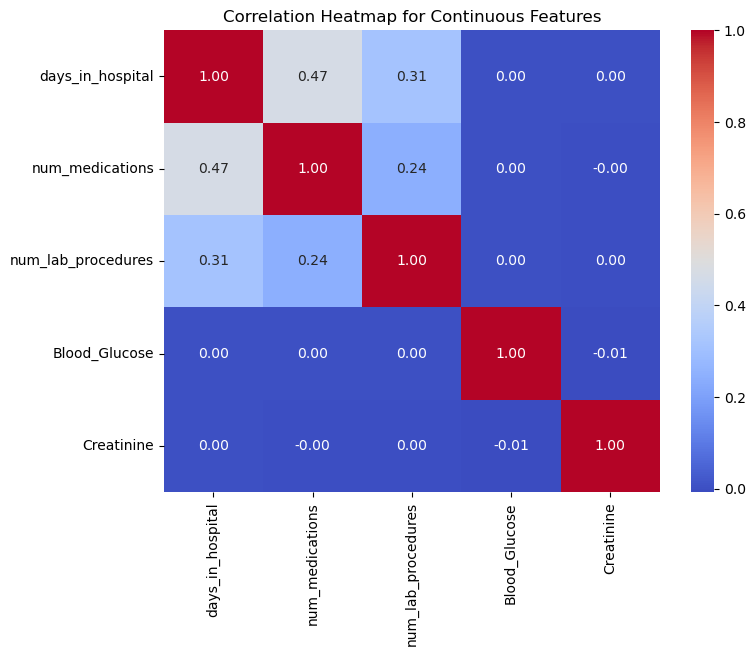

In [147]:
# Correlation heatmap for continuous variables
continuous_features = ['days_in_hospital', 'num_medications', 'num_lab_procedures', 'Blood_Glucose', 'Creatinine']
correlation_matrix = data[continuous_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Continuous Features')
plt.show()


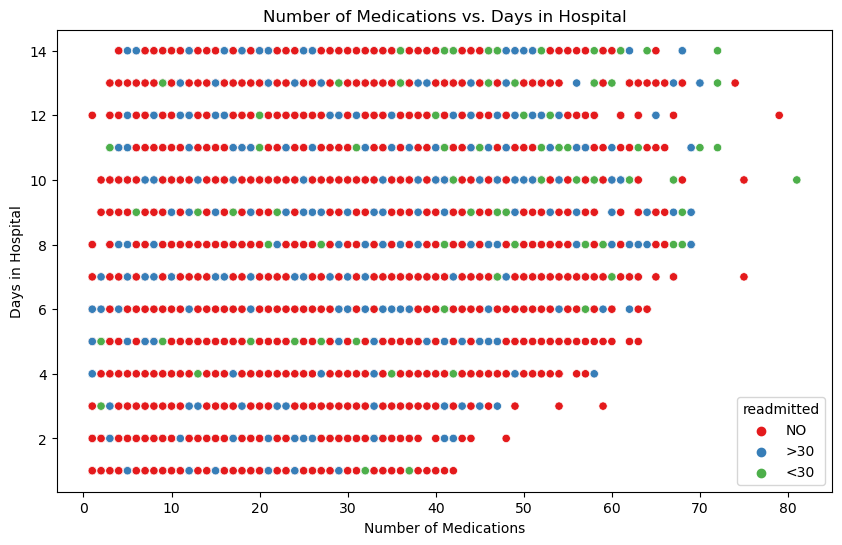

In [149]:
# Scatterplot of number of medications vs. days in hospital
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_medications', y='days_in_hospital', data=data, hue='readmitted', palette='Set1')
plt.title('Number of Medications vs. Days in Hospital')
plt.xlabel('Number of Medications')
plt.ylabel('Days in Hospital')
plt.show()


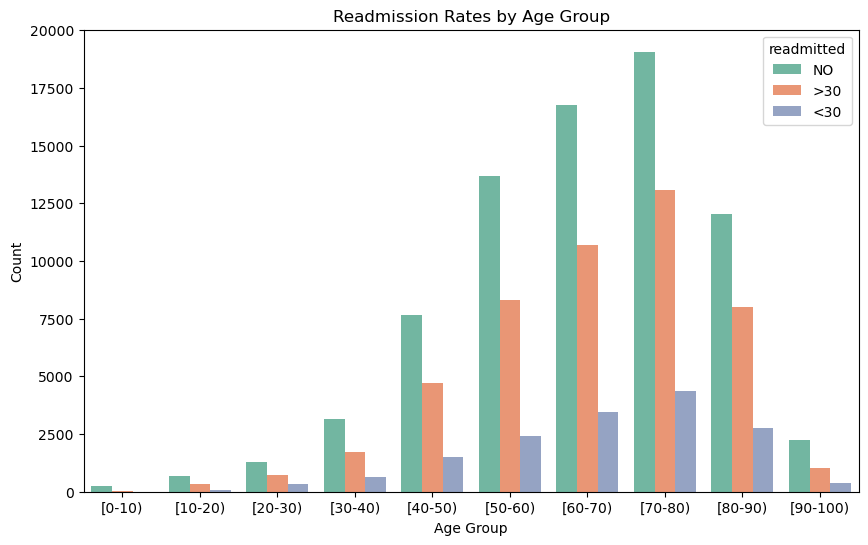

In [151]:
# Compare Categorical Predictors and Outcomes
#Bar plot for readmission rates by age group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='readmitted', data=data, palette='Set2')
plt.title('Readmission Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()
